<a href="https://colab.research.google.com/github/SowjanyaKiran/Time_series_sowanya/blob/main/Time_Series_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the data
df = pd.read_csv('/content/TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')

In [ ]:
# Getting the datetime index
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

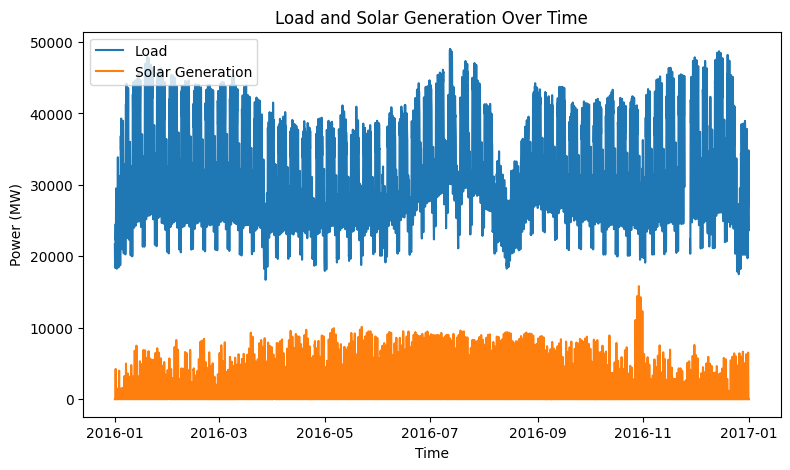

In [ ]:
#Plot
plt.figure(figsize = (9, 5))
plt.plot(df['utc_timestamp'], df['IT_load_new'], label = 'Load')
plt.plot(df['utc_timestamp'], df['IT_solar_generation'], label = 'Solar Generation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Load and Solar Generation Over Time')
plt.show()

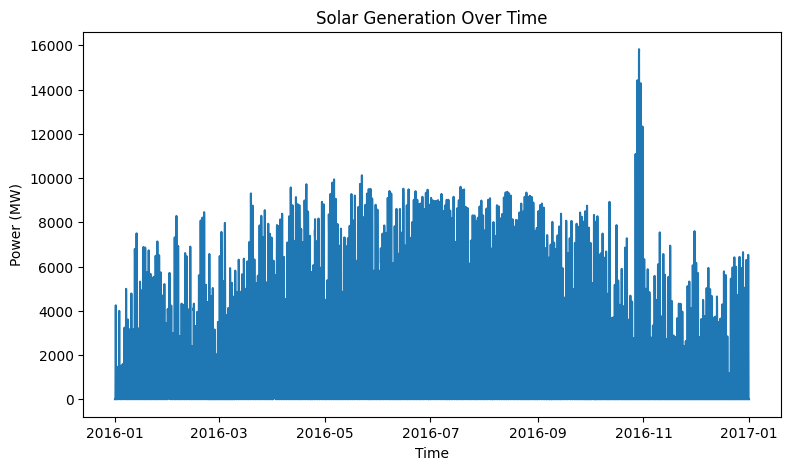

In [ ]:
#Plot
plt.figure(figsize = (9, 5))
plt.plot(df['utc_timestamp'], df['IT_solar_generation'])
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Solar Generation Over Time')
plt.show()

In [ ]:
#Range of value of "IT_Solar_generation"
print(max(df['IT_solar_generation'])-min(df['IT_solar_generation']))

15824


In [ ]:
#Data cleaning

In [ ]:
#Checking whether there are any NULL values in the data
df.isnull().sum()

,0
utc_timestamp,0
IT_load_new,72
IT_solar_generation,0


In [ ]:
# Filling the missing values using forward filling method
df['IT_load_new'].fillna(method = 'ffill', inplace = True)

# Checking for missing values
df.isnull().sum().any()

np.False_

In [ ]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller

#Function to perform Augmented Dickey- Fuller test
def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
#Driver code
print('ADF Test for "IT_load_new" after filling missing values:')
adf_test(df['IT_load_new'])

print('\nADF Test for "IT_solar_generartion" after filling missing values:')
adf_test(df['IT_solar_generation'])

ADF Test for "IT_load_new" after filling missing values:
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.197390e+01
p-value                        3.841445e-22
#Lags Used                     3.700000e+01
Number of Observations Used    8.746000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64

ADF Test for "IT_solar_generartion" after filling missing values:
Results of Augmented Dickey-Fuller Test:
Test Statistic                -5.741335e+00
p-value                        6.265438e-07
#Lags Used                     3.600000e+01
Number of Observations Used    8.747000e+03
Critical Value (1%)           -3.431098e+00
Critical Value (5%)           -2.861870e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


In [ ]:
#ACF and PACF Plots

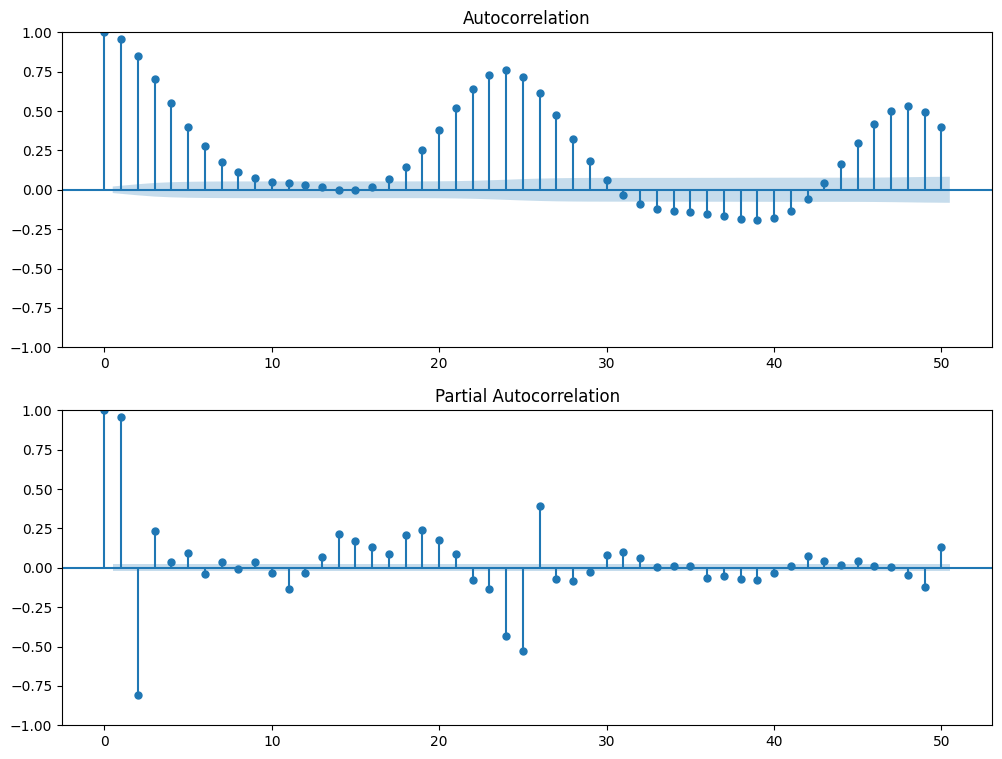

In [ ]:
#Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 9))
plot_acf(df['IT_load_new'], lags = 50 , ax = ax1)
plot_pacf(df['IT_load_new'], lags = 50 , ax = ax2)
plt.show()

In [ ]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#Split the data into training and testing
train_size = int(len(df['IT_load_new']) * 0.8)
train, test = df['IT_load_new'][:train_size], df['IT_load_new'][train_size:]

#Fit the ARIMA Model
model = ARIMA(train, order = (2, 0, 2))
model_fit = model.fit()

#Make predictions on the test data
predictions = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

#Calculate the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7714.952


In [ ]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#Split the data into training and testing
train_size = int(len(df['IT_load_new']) * 0.8)
train, test = df['IT_load_new'][:train_size], df['IT_load_new'][train_size:]

#Fit the ARIMA Model
model2 = ARIMA(train, order = (2, 1, 2))
model2_fit = model2.fit()

#Make predictions on the test data
predictions = model2_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

#Calculate the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7993.849


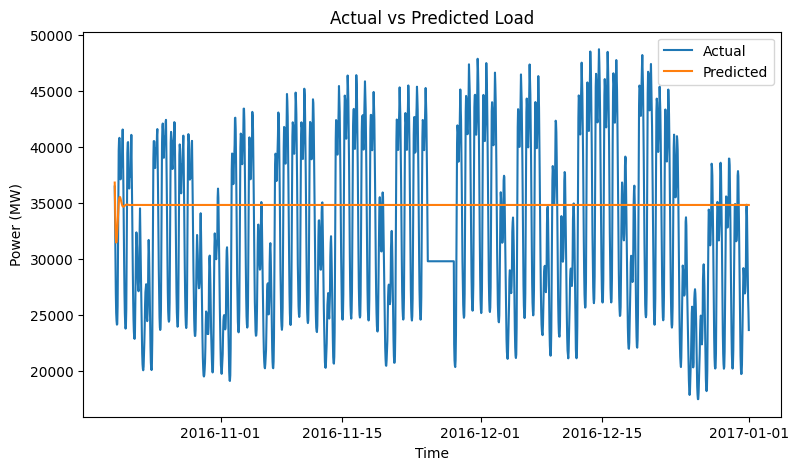

In [ ]:
#Plot
plt.figure(figsize = (9, 5))
plt.plot(df['utc_timestamp'][train_size:] , test , label = 'Actual')
plt.plot(df['utc_timestamp'][train_size:] , predictions , label = 'Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Actual vs Predicted Load')
plt.show()

In [ ]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#Split the data into training and testing
train_size = int(len(df['IT_load_new']) * 0.8)
train, test = df['IT_load_new'][:train_size], df['IT_load_new'][train_size:]

#Fit the ARIMA Model
model3 = ARIMA(train, order = (2, 2, 2))
model3_fit = model3.fit()

#Make predictions on the test data
predictions = model3_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

#Calculate the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 9290.389


In [ ]:
#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Fit the arima model
model = SARIMAX(train, seasonal_order = (2, 0, 2, 24))
model_fit = model.fit()

#Make predictions on the test data
predictions = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

#Calculate the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 5611.625


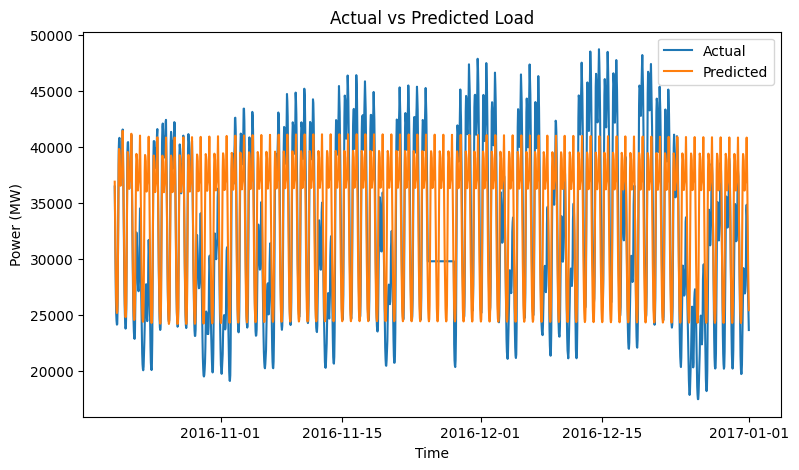

In [ ]:
#Plot
plt.figure(figsize = (9, 5))
plt.plot(df['utc_timestamp'][train_size:] , test , label = 'Actual')
plt.plot(df['utc_timestamp'][train_size:] , predictions , label = 'Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Actual vs Predicted Load')
plt.show()

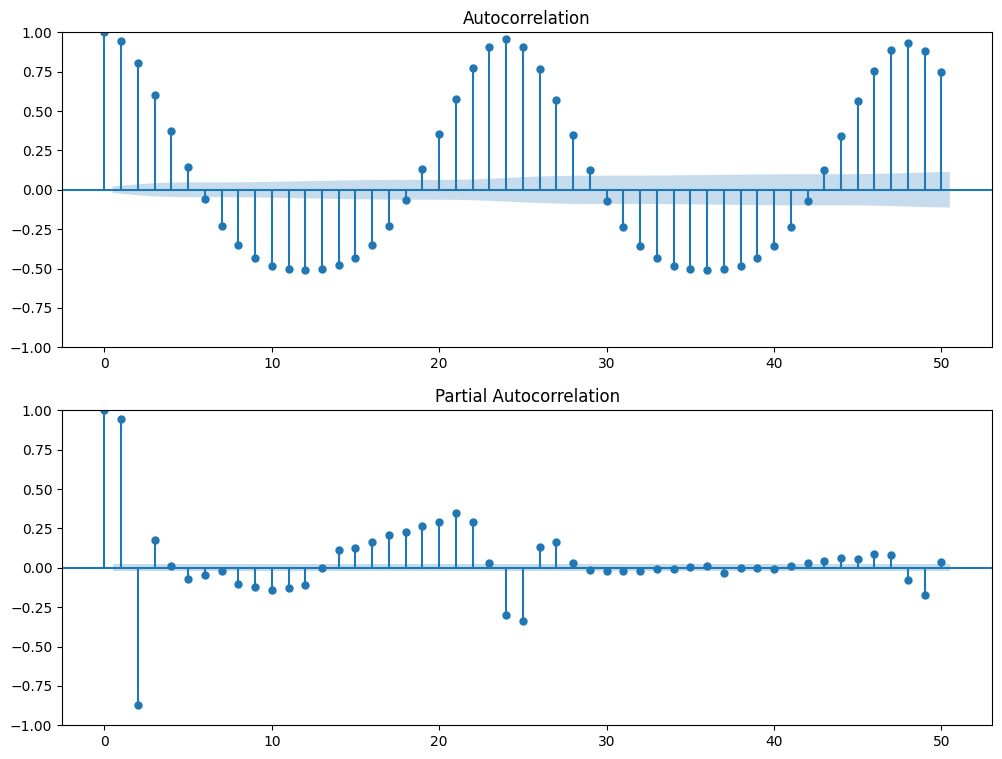

In [ ]:
#Plots for 'IT_solar_generation'
fig , (ax1 , ax2) = plt.subplots(2 , 1 , figsize = (12 , 9))
plot_acf(df['IT_solar_generation'] , lags = 50 , ax = ax1)
plot_pacf(df['IT_solar_generation'] , lags = 50 , ax = ax2)
plt.show()

In [ ]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#Split the data into training and testing
train_size = int(len(df['IT_solar_generation']) * 0.8)
train, test = df['IT_solar_generation'][:train_size], df['IT_solar_generation'][train_size:]

#Fit the ARIMA Model
model4 = ARIMA(train, order = (2, 0, 2))
model4_fit = model4.fit()

#Make predictions on the test data
predictions = model4_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

#Calculate the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2486.151


In [ ]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#Split the data into training and testing
train_size = int(len(df['IT_solar_generation']) * 0.8)
train, test = df['IT_solar_generation'][:train_size], df['IT_solar_generation'][train_size:]

#Fit the ARIMA Model
model4 = ARIMA(train, order = (2, 0, 7))
model4_fit = model4.fit()

#Make predictions on the test data
predictions = model4_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

#Calculate the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2484.253


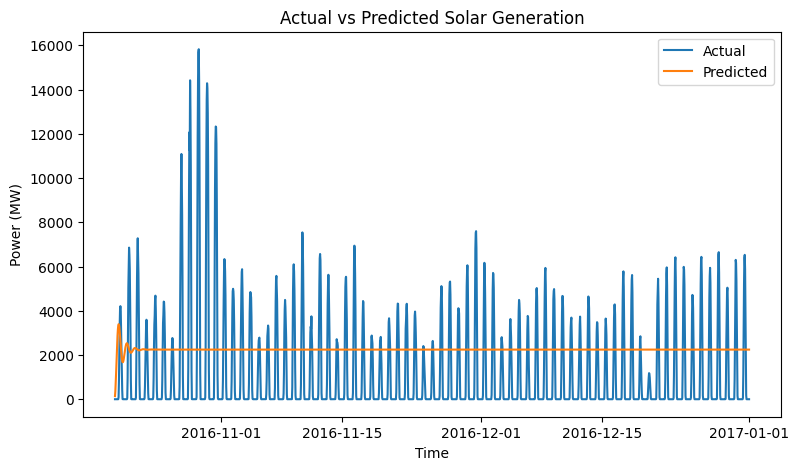

In [ ]:
#Plot
plt.figure(figsize = (9, 5))
plt.plot(df['utc_timestamp'][train_size:] , test , label = 'Actual')
plt.plot(df['utc_timestamp'][train_size:] , predictions , label = 'Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.title('Actual vs Predicted Solar Generation')
plt.show()

In [ ]:
#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Fit the sarima model
#Reduced complexity of seasonal order to address LinAlgError
model5 = SARIMAX(train, seasonal_order = (1, 0, 1, 24))
model5_fit = model5.fit()

#Make predictions on the test data
predictions = model5_fit.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

#Calculate the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1379.215


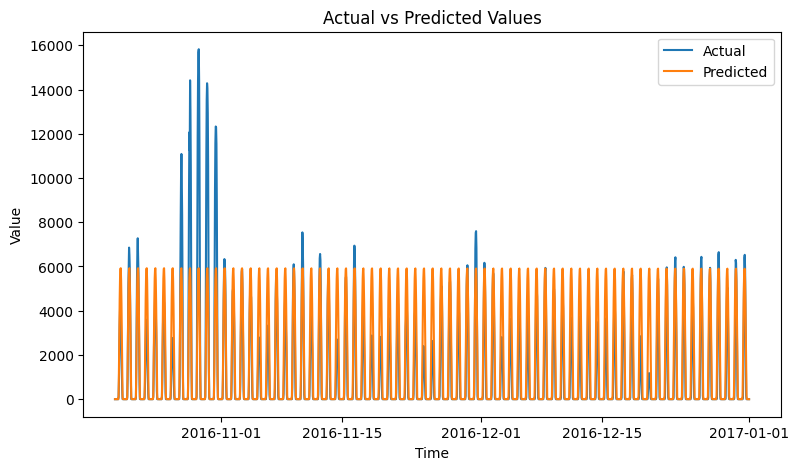

In [ ]:
# Plot
plt.figure(figsize = (9, 5))
plt.plot(df['utc_timestamp'][train_size:], test, label = 'Actual')
plt.plot(df['utc_timestamp'][train_size:], predictions, label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()